##08_군집화

##계층적 군집화(Hierarchical Clustering)

###1. 데이터셋 불러오기

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(123)
features = ['X', 'Y', 'Z']
id = ['ID0','ID1','ID2','ID3','ID4']

X = np.random.random_sample([5, 3])*10

In [ ]:
df = pd.DataFrame(X, columns = features, index = id)
print(df)

            X         Y         Z
ID0  6.964692  2.861393  2.268515
ID1  5.513148  7.194690  4.231065
ID2  9.807642  6.848297  4.809319
ID3  3.921175  3.431780  7.290497
ID4  4.385722  0.596779  3.980443


###5. 모델 추정: 계층적 군집화

계층적 군집화 with K = 3, Euclidean distance, Max distance

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
labels = agg.fit_predict(X)

print('Cluster labels: %s' %labels)

Cluster labels: [1 0 0 2 1]


계층적 군집화 with K = 2, Euclidean distacne, Max distance

In [ ]:
agg = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels = agg.fit_predict(X)

print('Cluter labels: %s' %labels)

Cluter labels: [0 1 1 0 0]


##분리형 군집화: K 평균 군집화(K-means Clustering)

###1. 데이터셋 불러오기

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.5, shuffle = True, random_state = 0)

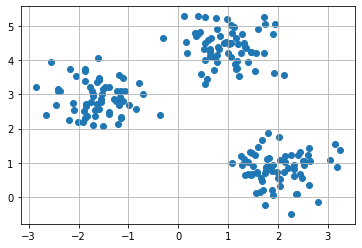

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], marker = 'o')
plt.grid()
plt.show()

###5. 모델 추정: K 평균 군집화

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 300, tol = 1e-04, random_state = 0) # n_clusters: 군집의 개수
y_km = km.fit_predict(X)

Elbow method

In [ ]:
distortions = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, n_init = 10, max_iter = 300, random_state = 0)
  km.fit(X)
  distortions.append(km.inertia_)

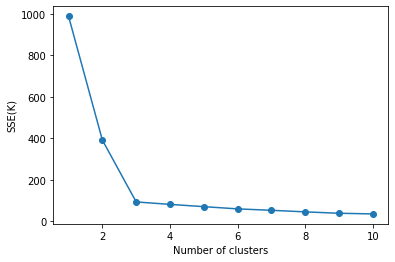

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE(K)')
plt.show()

###6. 결과 분석

Plotting results

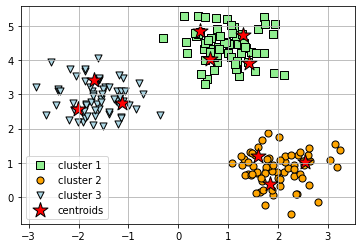

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s = 50, c = 'lightgreen', marker = 's', edgecolor = 'black', label = 'cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s = 50, c = 'orange', marker = 'o', edgecolor = 'black', label = 'cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s = 50, c = 'lightblue', marker = 'v', edgecolor = 'black', label = 'cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 250, c = 'red', marker = '*', edgecolor = 'black', label = 'centroids')

plt.legend(scatterpoints = 1)
plt.grid()
plt.show()

##분포 기반 군집화: DBSCAN(Density Based Clustering of Application with Noise)

###1. 데이터셋 불러오기

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)

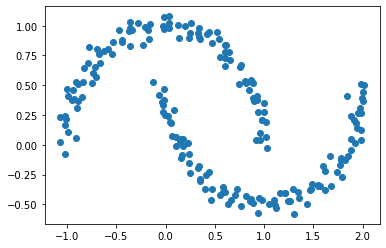

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1])
plt.show()

###5. 모델 추정 및 6. 결과 분석: DBSCAN, HDBSCAN

계층적 군집화, K 평균 군집화와 비교

In [ ]:
# 계층적 군집화(Hierachical Clustering, Agglomerative Clustering)
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 2, linkage = 'complete')
y_ac = ac.fit_predict(X)

# K 평균 군집화(K-means Clustering)
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2, random_state = 0)
y_km = km.fit_predict(X)

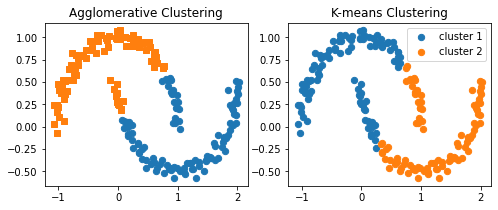

In [ ]:
import matplotlib.pyplot as plt
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 3))

# 계층적 군집화(Hierachical Clustering, Agglomerative Clustering)
ax1.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], marker = 'o', s = 40, label = 'cluster 1')
ax1.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], marker = 's', s = 40, label = 'clusrer 2')
ax1.set_title('Agglomerative Clustering')

# K 평균 군집화(K-means Clustering)
ax2.scatter(X[y_km == 0, 0], X[y_km == 0, 1], marker = 'o', s = 40, label = 'cluster 1')
ax2.scatter(X[y_km == 1, 0], X[y_km == 1, 1], marker = 'o', s = 40, label = 'cluster 2')
ax2.set_title('K-means Clustering')

plt.legend()
plt.show()

DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.2, min_samples = 5, metric = 'euclidean')
y_db = db.fit_predict(X)

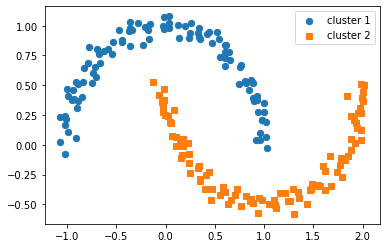

In [ ]:
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1], marker = 'o', s = 40, label = 'cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1], marker = 's', s = 40, label = 'cluster 2')
plt.legend()
plt.show()

HDBSCAN

In [ ]:
pip install hdbscan

     |████████████████████████████████| 6.4MB 8.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311689 sha256=1183fae6cda7264e4fe3e57c83afb83e1fb36f3c84164cc6679cdc22bd6bc6f7
  Stored in directory: /root/.cache/pip/wheels/42/63/fb/314ad6c3b270887a3ecb588b8e5aac50b0fad38ff89bb6dff2
Successfully built hdbscan


In [ ]:
import hdbscan
hdb = hdbscan.HDBSCAN(min_samples = 10)
y_hdb = hdb.fit_predict(X)

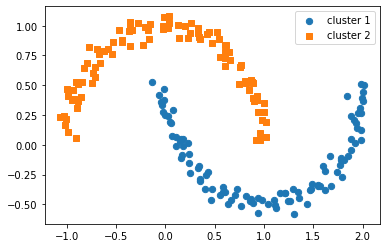

In [ ]:
plt.scatter(X[y_hdb==0,0], X[y_hdb==0,1], marker='o', s=40, label='cluster 1')
plt.scatter(X[y_hdb==1,0], X[y_hdb==1,1], marker='s', s=40, label='cluster 2')

plt.legend()
plt.show()

##plus. K 평균 군집화로 손글씨 학습

###1. 데이터셋 불러오기

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape # (관측치 개수, 특성병수 개수)

(1797, 64)

###5. 모델 추정: K 평균 군집화

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 10, random_state = 0) # n_cluters: 군집의 개수
clusters = km.fit_predict(digits.data)
aa = km.cluster_centers_.shape # kmeans.cluster_centers_: 각 군집의 개수

###6. 결과 분석

각 군집 중심값의 이미지(순서X)

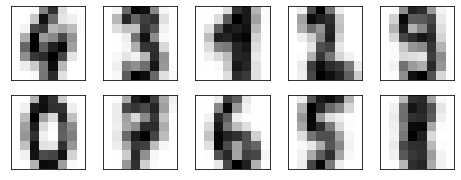

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 5, figsize = (8, 3))
centers = km.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
  axi.set(xticks = [], yticks = [])
  axi.imshow(center, interpolation = 'nearest', cmap = plt.cm.binary)

In [ ]:
#정확도 계산
import numpy as np
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
  mask = (clusters == i)
  labels[mask] = mode(digits.target[mask])[0] #군집 결과에 label 부여

In [ ]:
from sklearn. metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7952142459654981

In [ ]:
# 혼합 행렬 -> 오분류표 작성
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(digits.target, labels)
print(mat)

[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   1 155   0   2   0   7   7  11]
 [  0   7   0   0 163   0   0   7   4   0]
 [  0   0   0   1   2 136   1   0   0  42]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   0   0   0   0   0   0 177   2   0]
 [  0   6   3   4   0   4   2   5 102  48]
 [  0  20   0   6   0   6   0   7   2 139]]
